<a href="https://colab.research.google.com/github/Cinco33/Data_Science_Portfolio/blob/main/Crime_Data_DariusN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
upload = files.upload()


In [ ]:
#Information section
df.head()
df.info
df.describe()
df.columns

#Missing values
df.isnull().sum()


,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [ ]:
#Most common crime types
df['Crm Cd Desc'].value_counts().head(10)

,count
Crm Cd Desc,
VEHICLE - STOLEN,110804
BATTERY - SIMPLE ASSAULT,74688
BURGLARY FROM VEHICLE,61324
THEFT OF IDENTITY,60867
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",59639
BURGLARY,57743
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53395
THEFT PLAIN - PETTY ($950 & UNDER),51384
INTIMATE PARTNER - SIMPLE ASSAULT,46696


<Axes: xlabel='year'>

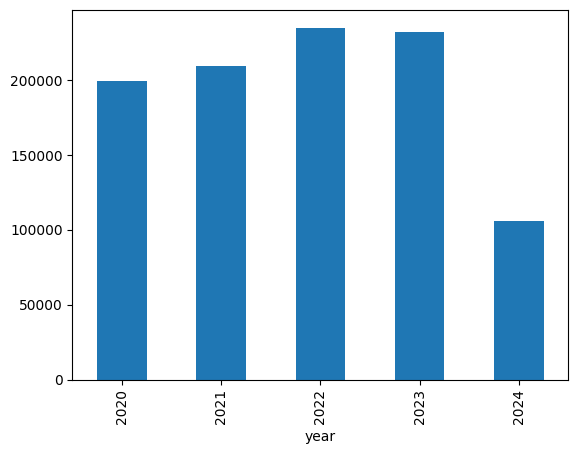

In [ ]:
#Crimes per year, month, etc.
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['year'] = df['DATE OCC'].dt.year

df['year'].value_counts().sort_index().plot(kind='bar')

In [ ]:
#Mapping 'LAT' and 'LON' using Folium
import folium

df_map = df.dropna(subset=['LAT','LON'])

center = [df_map['LAT'].mean(), df_map['LON'].mean()]
m = folium.Map(location=center, zoom_start=11)

for _, row in df_map.sample(2000).iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LON']],
        radius=1
    ).add_to(m)

m



In [ ]:
#Mapping 'LAT' and 'LON' using Tableau
df_export = df[['LAT', 'LON', 'Crm Cd Desc', 'DATE OCC', 'AREA NAME']]
df_export.to_csv("crime_for_tableau.csv", index=False)

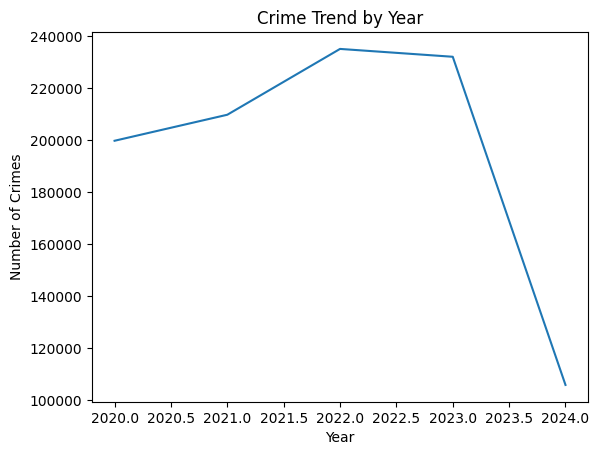

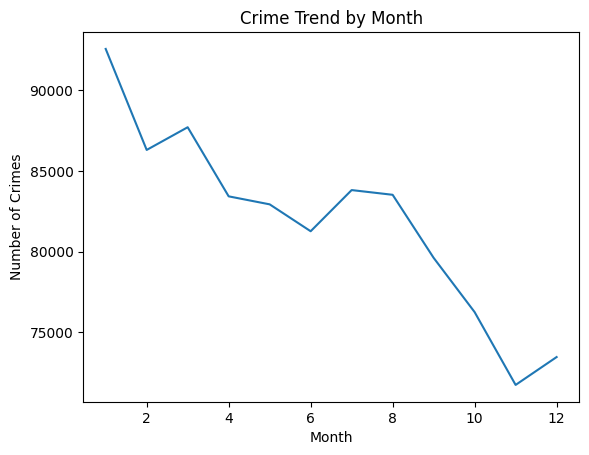

In [ ]:
# How have crimes changed over time?
import matplotlib.pyplot as plt

#Crimes per Year
df['Year'].value_counts().sort_index().plot(kind='line', title='Crime Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


#Crimes per Month
import matplotlib.pyplot as plt

df['Month'].value_counts().sort_index().plot(kind='line', title='Crime Trend by Month')
plt.ylabel('Number of Crimes')
plt.show()


/tmp/ipython-input-1801549925.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age Group'] = pd.cut(df_clean['Vict Age'], bins=bins, labels=labels, right=False)


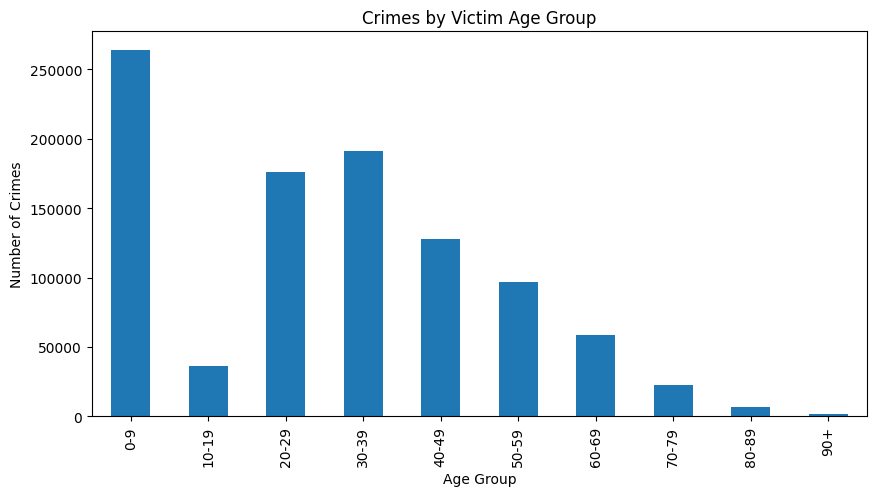

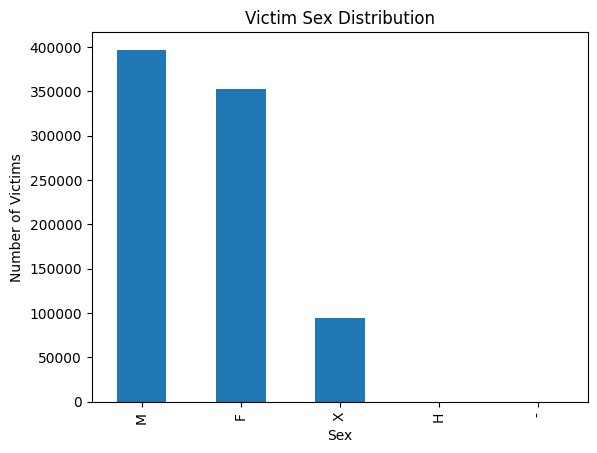

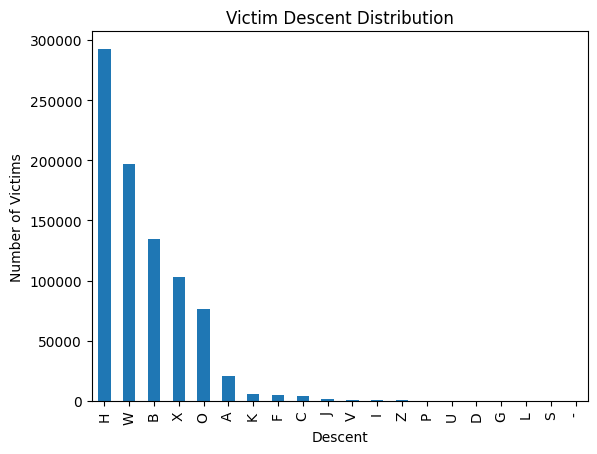

In [ ]:
#What are the most commmon victims? AGE,Sex and Demographics

#Victim Age Distribution
import matplotlib.pyplot as plt

# Define bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']

df_clean['Age Group'] = pd.cut(df_clean['Vict Age'], bins=bins, labels=labels, right=False)

# Count crimes per age group
age_counts = df_clean['Age Group'].value_counts().sort_index()

# Plot
age_counts.plot(kind='bar', figsize=(10,5), title='Crimes by Victim Age Group')
plt.ylabel('Number of Crimes')
plt.show()


#Victim Sex Distribution
df['Vict Sex'].value_counts().plot(kind='bar', title='Victim Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of Victims')
plt.show()

#Victim Descent Distribution
df['Vict Descent'].value_counts().plot(kind='bar', title='Victim Descent Distribution')
plt.xlabel('Descent')
plt.ylabel('Number of Victims')
plt.show()


Results and Key Findings:
The results demonstrate that crime patterns vary significantly over time, location, and demographics. The presence of crime hotspots, dominant crime types, and affected age groups confirms that crime is not randomly distributed. These findings support the use of data analytics for identifying meaningful trends in crime behavior.


In [1]:
!pip install nbconvert[webpdf]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 14.7 MB/s eta 0:00:00
